In [17]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [183]:
image = Image.open('word2.jpg').convert('L')
image = image.resize((80, 30), Image.Resampling.LANCZOS)

In [184]:
col_sum = np.sum(image, axis=0, keepdims=True)/255

In [185]:
col_sum.shape

(1, 80)

In [186]:
col_sum_2 = col_sum.shape[1] - col_sum

In [187]:
col_sum_2

array([[50.02745098, 51.47843137, 53.42745098, 54.24313725, 54.65490196,
        55.69803922, 56.13333333, 55.52941176, 55.21176471, 55.41176471,
        57.17254902, 60.32156863, 60.96470588, 59.19215686, 59.4745098 ,
        60.43921569, 59.7372549 , 57.46666667, 56.13333333, 56.11372549,
        56.86666667, 57.90196078, 59.4627451 , 60.43137255, 59.52156863,
        57.33333333, 54.04705882, 50.43137255, 50.18431373, 53.56862745,
        58.02745098, 60.79607843, 61.7372549 , 58.74901961, 55.32941176,
        54.09803922, 53.61176471, 53.21176471, 53.01176471, 54.41960784,
        56.30980392, 57.36078431, 58.14901961, 58.79607843, 60.03137255,
        60.44313725, 58.2627451 , 55.31372549, 51.0745098 , 50.04313725,
        50.02745098, 52.30588235, 57.59215686, 60.88627451, 63.37647059,
        61.61176471, 58.78431373, 57.64705882, 57.71764706, 59.35294118,
        59.90196078, 59.96862745, 60.03529412, 59.59607843, 58.31372549,
        55.89411765, 55.10588235, 55.1254902 , 55.0

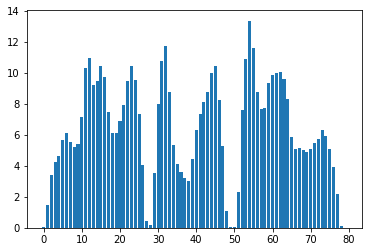

In [190]:
_ = plt.bar(np.arange(0,80), col_sum_2.ravel()-50)

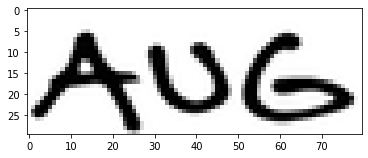

In [191]:
plt.imshow(image, cmap='gray')

In [192]:
_

<BarContainer object of 80 artists>

In [193]:
import cv2

In [442]:
input_image = cv2.imread('word4.jpg')

(60, 333, 3)

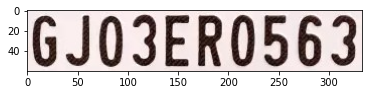

In [443]:
plt.imshow(input_image)
input_image.shape

In [444]:
grayImage= cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY).T

In [445]:
grayImage.shape

(333, 60)

In [446]:
GaussianFilter= cv2.GaussianBlur(grayImage, (5,5), 0)

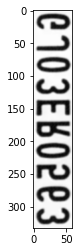

In [447]:
plt.imshow(GaussianFilter, cmap='gray')

In [448]:
_, binarizedImage = cv2.threshold(GaussianFilter, 127, 255, cv2.THRESH_BINARY)

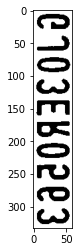

In [449]:
plt.imshow(binarizedImage, cmap='gray')

In [450]:
binarizedImage[binarizedImage == 0] = 1
binarizedImage[binarizedImage == 255] = 0

In [451]:
horizontal_projection = np.sum(binarizedImage, axis=1);
print(horizontal_projection);

[ 0  0  0  0  0  0 21 33 38 41 43 45 47 27 17 15 14 13 17 19 22 25 36 36
 34 33 31 28 23  0  0  0  0  0  0  0  0  0  0  2  6  7  9  9 10 10  9  8
  7  8  8  8  8  7  8 29 46 47 46 45 43 39  0  0  0  0  0  0  0  0  0  0
 14 28 37 41 43 45 46 25 16 13 14 13 13 14 15 23 37 46 44 41 38 31 16  0
  0  0  0  0  0  0  0  0  0  2  9 15 17 17 19 19 17 16 15 15 15 20 23 25
 29 40 47 45 43 39 30 19  0  0  0  0  0  0  0  0  0  0 47 49 49 49 49 49
 32 23 21 21 21 21 21 21 21 21 21 20 17 15 13 13  5  0  0  0  0  0  0  0
  0  0 12 49 49 49 49 49 48 22 19 17 17 18 20 25 30 35 39 49 41 35 31 25
 16 10  0  0  0  0  0  0  0  0  0 10 28 36 40 43 45 47 30 19 15 15 14 14
 14 17 24 37 46 44 42 39 34 22  0  0  0  0  0  0  0  0  0  0 21 35 36 37
 38 39 37 30 25 21 21 21 21 21 23 24 36 34 34 32 28 20 16  0  0  0  0  0
  0  0  0  0  0  0 28 36 40 42 44 46 47 33 24 21 20 19 19 22 25 38 37 36
 33 30 26 20  0  0  0  0  0  0  0  0  0  0  0  4 11 14 17 18 19 18 17 15
 14 14 16 19 21 24 27 38 46 45 43 41 34 26 11  0  0

In [452]:
height, width = binarizedImage.shape
print('width : ', width)
print('height : ', height)

width :  60
height :  333


In [453]:
blankImage = np.zeros((height, width), np.uint8)

In [454]:
for row in range(height):
    cv2.line(blankImage, (0,row), (int(horizontal_projection[row]*0.8),row), (255), 1)

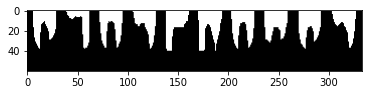

In [455]:
plt.imshow(blankImage.T, cmap='gray')

In [456]:
blankImage.shape

(333, 60)

In [457]:
blanksum = np.sum(blankImage, axis=1)

In [458]:
np.where(blanksum == 255)

(array([  0,   1,   2,   3,   4,   5,  29,  30,  31,  32,  33,  34,  35,
         36,  37,  38,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
         95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 161, 162, 163, 164, 165, 166,
        167, 168, 169, 194, 195, 196, 197, 198, 199, 200, 201, 202, 226,
        227, 228, 229, 230, 231, 232, 233, 234, 235, 259, 260, 261, 262,
        263, 264, 265, 266, 267, 268, 269, 292, 293, 294, 295, 296, 297,
        298, 299, 300, 301, 302, 327, 328, 329, 330, 331, 332], dtype=int64),)

In [495]:
im = Image.open('word4.jpg').convert('L')

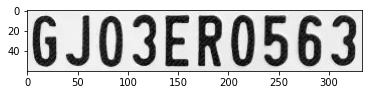

In [496]:
plt.imshow(im, cmap='gray')

In [497]:
new_im = np.array(im)

In [498]:
new_im = new_im[:, 5:30]

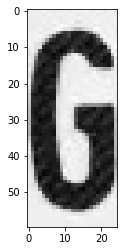

In [499]:
plt.imshow(new_im, cmap='gray')

In [500]:
Image.fromarray(new_im).resize((28,28), Image.Resampling.LANCZOS).save('g.jpg')